# Logistic Regression from Scratch
(for a binary classification case with gradient descent optimization and binary cross-entropy loss)


In [236]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generating fake Data

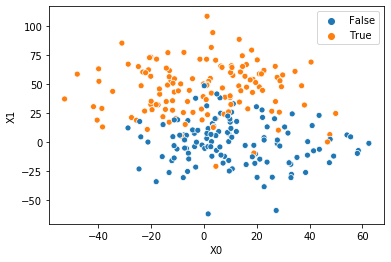

In [237]:
from sklearn.datasets import make_biclusters
data = make_biclusters((2,250), 2, 20, random_state=2)
X, y = data[0].T, data[2][0]
sns.scatterplot(X[:, 0], X[:, 1], hue=y)
plt.xlabel('X0')
plt.ylabel('X1')

# Add column of 1s for bias term
X = np.hstack((X, np.ones((len(X), 1))))

# Benchmark: `sklearn` Logistic Regression

In [238]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

benchmark = LogisticRegression()
benchmark.fit(X, y)
print(classification_report(y, benchmark.predict(X)))

precision    recall  f1-score   support

       False       0.88      0.88      0.88       120
        True       0.89      0.89      0.89       130

    accuracy                           0.89       250
   macro avg       0.89      0.89      0.89       250
weighted avg       0.89      0.89      0.89       250



# Scratch Model

$p(y=c_1 | \textbf{x}) = sigmoid(\textbf{Xw})$ where $sigmoid(\textbf{x}) = \frac{1}{1+e^{-x}}$  

We'll use the $l_2$ regularized binary cross-entropy loss which is defined as   
$L(\textbf{W}) = -\sum_{n\in c_1} \ln(sigmoid(\textbf{x}_n \textbf{w})) -\sum_{n'\in c_0} \ln(sigmoid(1- \textbf{x}_{n'} \textbf{w})) + \lambda \cdot 0.5 \cdot \sum_{d=1}^D w_d^2 $.

The gradient of the regularized loss w.r.t. w is given by  

$\textbf{X}^T (sigmoid(\textbf{X} \textbf{w}) - I(y==c_1)) + \lambda \textbf{w}$

In [239]:
### Function Definitions ###
_eps = 1e-5

def sigmoid(x):
    return 1/(1+np.exp(-x))

def loss(target, pred, w, lbda):
    loss = -np.sum(np.log(pred[target==1] + _eps)) - np.sum(np.log(1-pred[target==0] + _eps))
    return loss + lbda * 0.5 * np.linalg.norm(w)**2

def dl_dw(X, preds, y, w, lbda):
    return X.T @ (preds - (y==1).reshape(-1, 1)) + lbda * w

EPOCH 0: loss = 456.6900772940527
EPOCH 1: loss = 418.4003728981981
EPOCH 2: loss = 373.62279374344917
EPOCH 3: loss = 321.9990960515319
EPOCH 4: loss = 266.89531229926723
EPOCH 5: loss = 211.19507561983582
EPOCH 6: loss = 160.98157751871935
EPOCH 7: loss = 124.09773093983478
EPOCH 8: loss = 104.36259402778678
EPOCH 9: loss = 97.12067292599123
EPOCH 10: loss = 96.59405483096833
EPOCH 11: loss = 96.70542887571716
EPOCH 12: loss = 96.87659760482866
EPOCH 13: loss = 97.6364875647757
EPOCH 14: loss = 98.1133200613285
EPOCH 15: loss = 101.24877441349678
EPOCH 16: loss = 100.31311738149536
EPOCH 17: loss = 107.76745716490713
EPOCH 18: loss = 100.49897814155882
EPOCH 19: loss = 107.89336888978787
EPOCH 20: loss = 100.3502916299919
EPOCH 21: loss = 107.72300222074374
EPOCH 22: loss = 100.16739860563946
EPOCH 23: loss = 107.49031154677725
EPOCH 24: loss = 99.99152925939767
EPOCH 25: loss = 107.2834855063515
EPOCH 26: loss = 99.8134133367444
EPOCH 27: loss = 107.0641271046565
EPOCH 28: loss = 99

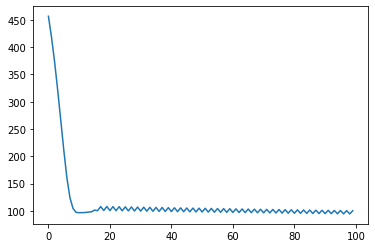

In [240]:
# Random initilazation
w = np.random.randn(X.shape[1], 1)

# Regularization Parameter
lbda = 1
losses = []

for epoch in range(100):
    preds = sigmoid(X @ w)
    losses.append(loss(y, preds, w, lbda))
    print(f"EPOCH {epoch}: loss = {losses[-1]}")
    w -= 0.0001 * dl_dw(X, preds, y, w, lbda)

sns.lineplot(np.arange(len(losses)), losses)

In [241]:
preds = sigmoid(X @ w) > 0.5
print(classification_report(y.reshape(-1, 1), preds))

precision    recall  f1-score   support

       False       0.90      0.75      0.82       120
        True       0.80      0.92      0.86       130

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.84       250
weighted avg       0.85      0.84      0.84       250

